<a href="https://colab.research.google.com/github/rchang18/MAT-241/blob/main/Module_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 19.1 Root Finding Problem Statement

The root of a function is when F(x) = 0. Finding the exact roots of a function can be a bit complex depending on the simplicity of the function itself.

For example finding the root of the equation F(x) = e^(3x) - cos(2x) can be solved analytically using python.

In [ ]:
import numpy as np
from scipy import optimize
import math

f = lambda x: math.exp(3*x) - np.cos(2*x)
x = optimize.fsolve(f, -2)
print("x =", x)

# Verify the solution is a root
result = f(x)

x = [-2.35661967]


<ipython-input-5-9c4657e83176>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f = lambda x: math.exp(3*x) - np.cos(2*x)


# 19.2 Tolerance

Error is the amount of deviation from the expected answer. Tolerance is the amount of allowable error. For most engineering applications tolerance is defined so that the error is an acceptable level for safety.

Error can be measured in different way such as the absolute value or difference from one iteration to the next.

# 19.3 Bisection Method

Intermediate value thereom states that if there is a continuous function between a and b and that a and b have opposite signs then there must be a value c where F(c) = 0. The bisection method uses this thereom in order to find roots such that the midpoint is m = (a+b)/2. If this calculation is greater than zero then the root is assumed to be in the (m,b) interval. If that calculation is less than zero then the root is assumed to be in the (a,m) interval.

Using python to solve for the root of F(x) = x^3 + 7.

In [7]:
import numpy as np

def my_bisection(f, a, b, tol):
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")

    # get midpoint
    m = (a + b)/2

    if np.abs(f(m)) < tol:
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        return my_bisection(f, a, m, tol)
f = lambda x: x**3 + 7

r1 = my_bisection(f, -4, 0, 0.01)
print("r1 =", r1)
r01 = my_bisection(f, -4, 0, 0.01)
print("r01 =", r01)

print("f(r1) =", f(r1))
print("f(r01) =", f(r01))

r1 = -1.912109375
r01 = -1.912109375
f(r1) = 0.009017862379550934
f(r01) = 0.009017862379550934


When using the bounds of (-4, 0) and a tolerance of 0.01, the root of the function is found to be around -1.912. If the bounds are not set correctly say at (0, 2) the function would return that there is no root to be found in that interval.

In [8]:
f = lambda x: x**3 + 7

r1 = my_bisection(f, 0, 0, 0.01)
print("r1 =", r1)
r01 = my_bisection(f, 0, 2, 0.01)
print("r01 =", r01)

print("f(r1) =", f(r1))
print("f(r01) =", f(r01))

Exception: The scalars a and b do not bound a root

# 19.4 Newton-Raphson Method

Given a smooth and continuous function Newton-Raphson method uses linear approximation around an initial guess of the root value to move closer to the true value. The equation looks like:

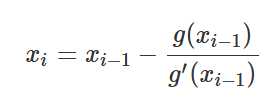


Where X(i-1) is the previous guess and X(i) is the improved value. We can use python to find the root using this method. Let's use F(x) = x^3 + 7.

In [11]:
def my_newton(f, df, x0, tol):
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)
f = lambda x: x**3 + 7
f_prime = lambda x: 3*x**2
estimate = my_newton(f, f_prime, -4, 0.01)
print("estimate =", estimate)

estimate = -1.913369391148744


Using the same tolerance as the Bisection method and a starting guess of -4, the Newton-Raphson method returned a root of -1.913 compared to -1.912 from Bisection method.

#19.5 Root Finding in Python

Instead of coding out different methods for root finding, python has a root finding function f_solve. For the function F(x) = x^3 + 7 it would look something like this:

In [17]:
from scipy.optimize import fsolve
f= lambda x: x**3 + 7
fsolve(f,[-4])

array([-1.91293118])